Возьмите датасет с отключением клиентов от телефонной компании.

Подготовьте данные для решения задачи.

Решите задачу с помощью нейронной сети, используя слои Dense как мы делали на уроке.

Ваша задача правильно написать “голову” сети и подобрать правильно loss функцию.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score

In [2]:
df_train = pd.read_csv('churn-bigml-80.csv')
df_test = pd.read_csv('churn-bigml-20.csv')

In [3]:
df_train = df_train.drop(['State', 'Area code', 'Account length', 'Total day minutes', 'Total eve minutes','Total night minutes', 'Total intl minutes'], axis = 1)
df_test = df_test.drop(['State', 'Area code', 'Account length', 'Total day minutes', 'Total eve minutes','Total night minutes', 'Total intl minutes'], axis = 1)

In [4]:
df_train['International plan'] = df_train['International plan'].map({'No': 0 ,'Yes': 1})
df_train['Voice mail plan'] = df_train['Voice mail plan'].map({'No': 0 ,'Yes': 1})

df_test['International plan'] = df_test['International plan'].map({'No': 0 ,'Yes': 1})
df_test['Voice mail plan'] = df_test['Voice mail plan'].map({'No': 0 ,'Yes': 1})

df_train['Churn'] = df_train['Churn'].map({True: 1 ,False: 0})
df_test['Churn'] = df_test['Churn'].map({True: 1 ,False: 0})

In [5]:
df_train

,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,98,22.90,68,16.12,128,9.96,5,3.19,2,0
2662,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
2663,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
2664,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0


In [6]:
X_train = df_train.drop(['Churn'], axis = 1)
X_test = df_test.drop(['Churn'], axis = 1)

In [7]:
X_train.shape

(2666, 12)

In [8]:
Y_train = df_train['Churn']
Y_test = df_test['Churn']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()

In [11]:
X_train_ss = ss.fit_transform(X_train)

In [12]:
X_test_ss = ss.transform(X_test)

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers

model = models.Sequential()

model.add(layers.Dense(100, activation="relu", input_shape = (12,)))
model.add(layers.Dense(1, activation="sigmoid"))

In [14]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train_ss, Y_train, validation_data = (X_test_ss, Y_test), epochs = 10, batch_size = 240)

Epoch 1/10
12/12 [==============================] - 2s 34ms/step - loss: 0.5571 - accuracy: 0.8121 - val_loss: 0.4960 - val_accuracy: 0.8501
Epoch 2/10
12/12 [==============================] - 0s 8ms/step - loss: 0.4673 - accuracy: 0.8605 - val_loss: 0.4317 - val_accuracy: 0.8561
Epoch 3/10
12/12 [==============================] - 0s 8ms/step - loss: 0.4169 - accuracy: 0.8571 - val_loss: 0.3966 - val_accuracy: 0.8561
Epoch 4/10
12/12 [==============================] - 0s 8ms/step - loss: 0.3863 - accuracy: 0.8563 - val_loss: 0.3749 - val_accuracy: 0.8561
Epoch 5/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3671 - accuracy: 0.8571 - val_loss: 0.3604 - val_accuracy: 0.8546
Epoch 6/10
12/12 [==============================] - 0s 8ms/step - loss: 0.3532 - accuracy: 0.8582 - val_loss: 0.3507 - val_accuracy: 0.8576
Epoch 7/10
12/12 [==============================] - 0s 8ms/step - loss: 0.3430 - accuracy: 0.8586 - val_loss: 0.3431 - val_accuracy: 0.8561
Epoch 8/10
12/12 [

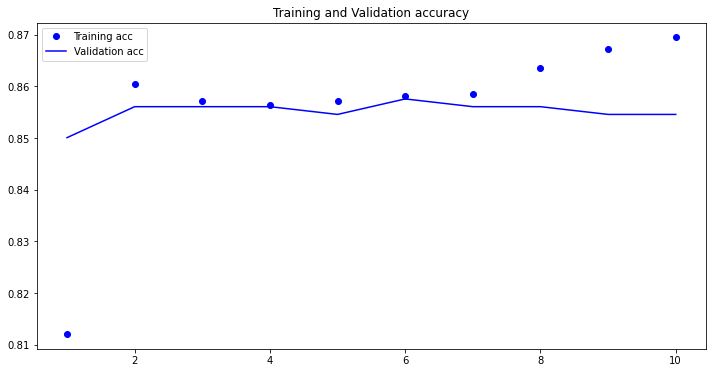

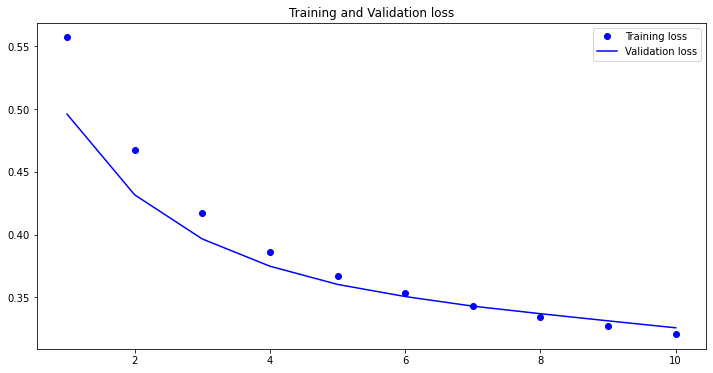

In [17]:
import matplotlib.pyplot as plt
# графики
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [18]:
predictions = model.predict(X_test_ss)

21/21 [==============================] - 0s 1ms/step


In [19]:
predictions

array([[0.15117837],
       [0.2726668 ],
       [0.28527036],
       [0.07362573],
       [0.09190462],
       [0.02887552],
       [0.186245  ],
       [0.3840492 ],
       [0.15928309],
       [0.12630443],
       [0.14338124],
       [0.16517904],
       [0.16780308],
       [0.0216248 ],
       [0.10720952],
       [0.09758417],
       [0.30452427],
       [0.05847985],
       [0.09510916],
       [0.13433333],
       [0.03736864],
       [0.04085609],
       [0.21723822],
       [0.07818445],
       [0.1195782 ],
       [0.12700605],
       [0.05689796],
       [0.09268275],
       [0.16938071],
       [0.08261809],
       [0.10500583],
       [0.19309448],
       [0.03517606],
       [0.3156243 ],
       [0.18447499],
       [0.37534454],
       [0.13113296],
       [0.12690745],
       [0.07913178],
       [0.08920305],
       [0.06731648],
       [0.409473  ],
       [0.01398754],
       [0.38129258],
       [0.10186131],
       [0.01084908],
       [0.18710482],
       [0.216

In [20]:
rounded_arr = np.round(predictions).astype(int)
pred = np.squeeze(rounded_arr)

In [21]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
accuracy_score(Y_test, pred)

0.8545727136431784